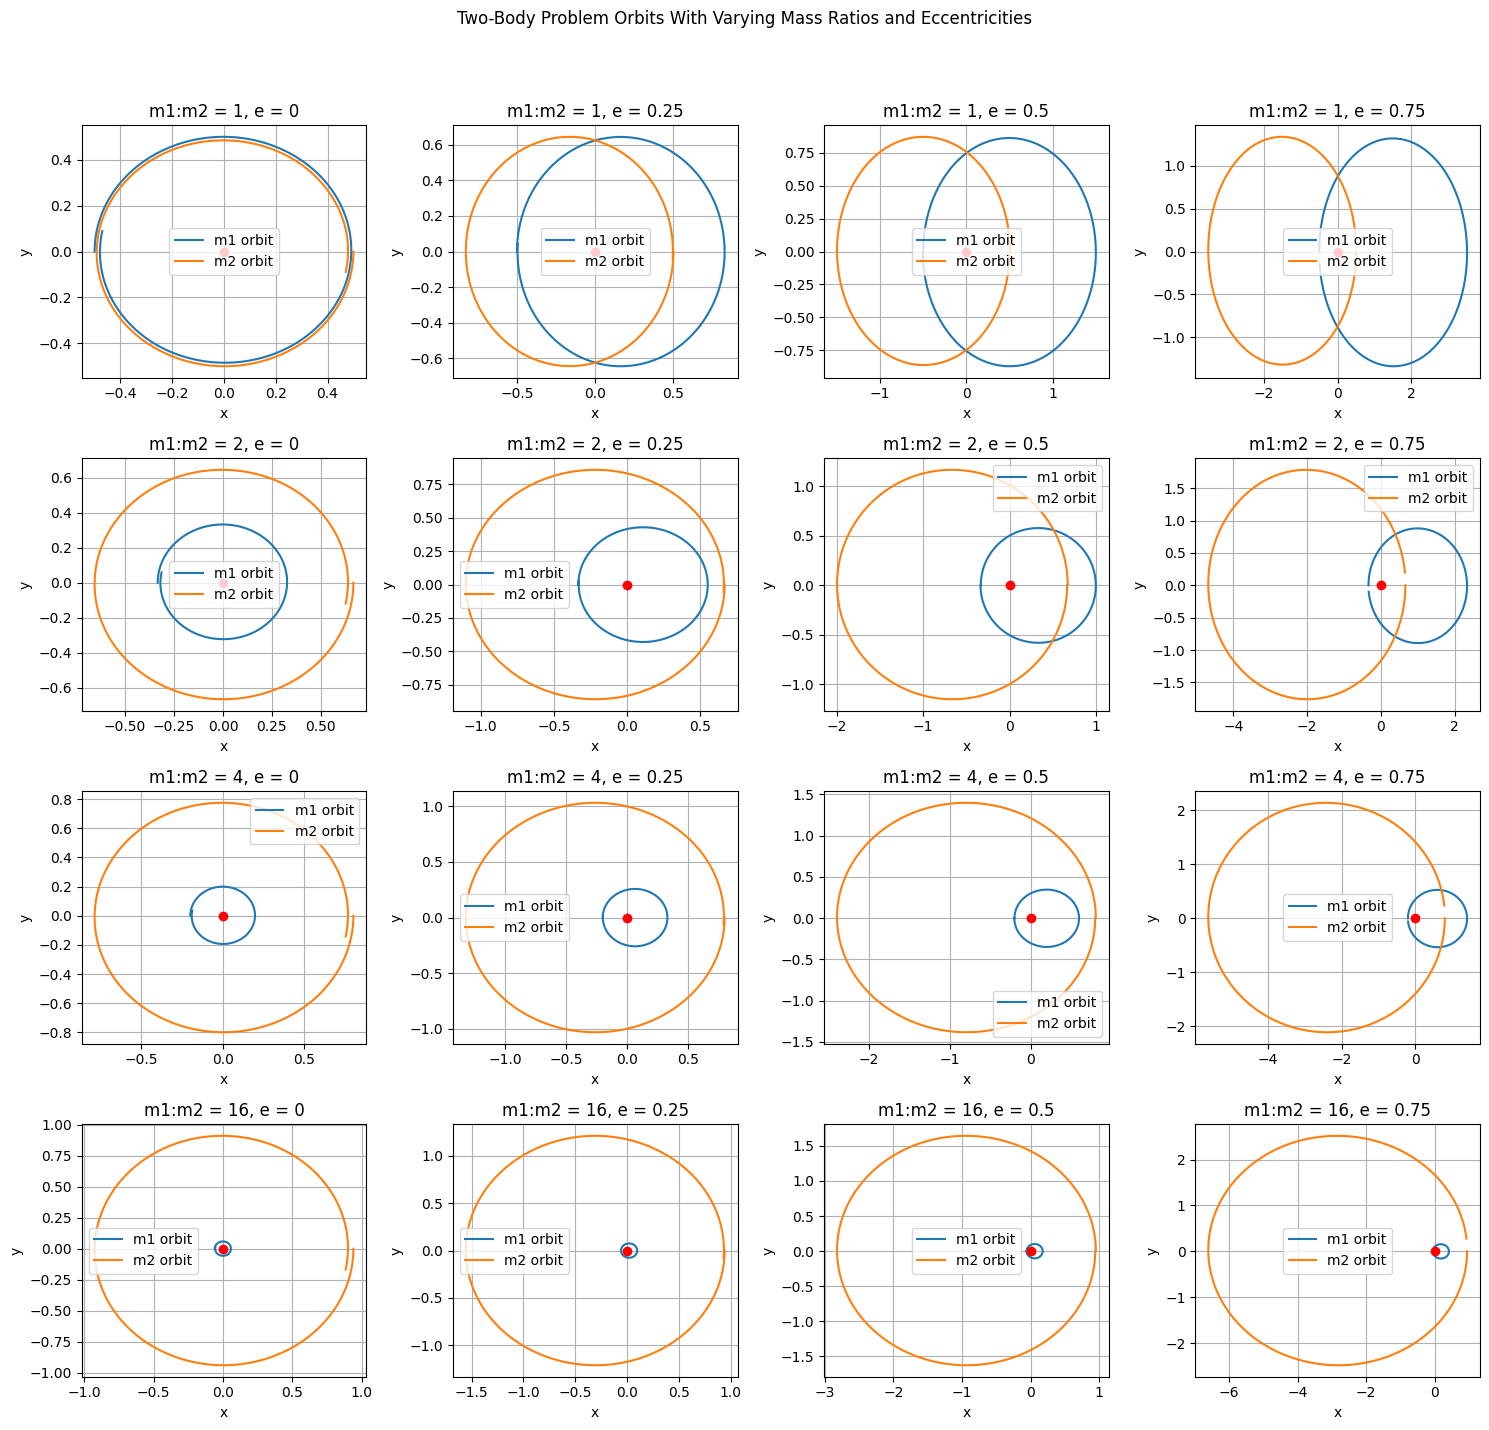

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Gravitational constant
G = 6.67408e-11
massRatios = [1, 2, 4, 16]  # Different mass ratios when comparing two masses
eccentricities = [0, 0.25, 0.50, 0.75]

def period(e):
    return 2 * np.pi / (1-e)**(3/2)

# System of equations for two body problem
def twoBodySystemEquations(t, conditions):
    x, x1, y, y1 = conditions
    r = np.sqrt(x**2 + y**2)
    x2 = -x / r**3
    y2 = -y / r**3
    return [x1, x2, y1, y2]

# Set up the figure for plotting
fig, axes = plt.subplots(len(massRatios), len(eccentricities), figsize=(15, 15))
fig.suptitle("Two-Body Problem Orbits With Varying Mass Ratios and Eccentricities")

# Looping through each eccentricity and mass ratio combo
for i in range(4):
    for j in range(4):
        # Masses
        m1 = massRatios[i]
        m2 = 1
        total_mass = m1 + m2
        x0 = -1 # x part of initial position
        y0 = 0 # y part of initial position
        x0_1 = 0  # x component of initial velocity
        y0_1 = np.sqrt(1 + eccentricities[j])  # y component of initial velocity
        initialConditions = [x0, x0_1, y0, y0_1]
        timeSpan = (0, 2 * np.pi/(1-eccentricities[j])**(3/2)) #interval
        tEval = np.linspace(0,2 * np.pi/(1-eccentricities[j])**(3/2), 1000) #points for integration
        solution = solve_ivp(twoBodySystemEquations, timeSpan, initialConditions, t_eval=tEval, method='RK45')# Solve equations with SciPy
        x, y = solution.y[0], solution.y[2]# Get the positions from the solution

        # Compute the positions of m1 and m2 with respect to the center of mass
        x1 = (m2 / total_mass) * x
        y1 = (m2 / total_mass) * y
        x2 = -(m1 / total_mass) * x
        y2 = -(m1 / total_mass) * y

        # Plot the orbits
        ax = axes[i, j]
        ax.plot(x1, y1, label="m1 orbit")
        ax.plot(x2, y2, label="m2 orbit")
        ax.plot(0, 0, 'ro')  # Center of mass
        ax.set_title("m1:m2 = " + str(massRatios[i]) + ", e = " + str(eccentricities[j]))
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid()
        ax.legend()

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
